## Random Forest Classification

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [3]:
def get_TPR(actual, prediction):
    TP = confusion_matrix(actual, prediction)[1][1]
    FN = confusion_matrix(actual, prediction)[1][0]
    TPR = (TP/(TP+FN))
    
    return TPR
    
def get_FPR(actual, prediction):
    FP = confusion_matrix(actual, prediction)[0][1]
    TN = confusion_matrix(actual, prediction)[0][0]
    FPR = (FP/(FP+TN))
    
    return FPR

In [4]:
SMdata = pd.read_csv('SMData.csv')
SMdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13198 entries, 0 to 13197
Data columns (total 12 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Unnamed: 0                                                13198 non-null  int64  
 1    Debt ratio %                                             13198 non-null  float64
 2    Borrowing dependency                                     13198 non-null  float64
 3    Liability to Equity                                      13198 non-null  float64
 4    Net Income to Stockholder's Equity                       13198 non-null  float64
 5    Persistent EPS in the Last Four Seasons                  13198 non-null  float64
 6    ROA(C) before interest and depreciation before interest  13198 non-null  float64
 7    Net worth/Assets                                         13198 non-null  float64
 8    ROA(B) before i

In [5]:
x = SMdata.drop(columns = ["Bankrupt?"])
y = pd.DataFrame(SMdata["Bankrupt?"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2023)

In [15]:
RFclf = RandomForestClassifier(n_estimators = 100)  
RFclf.fit(x_train, y_train.values.ravel())

y_trainpred = RFclf.predict(x_train)
y_testpred = RFclf.predict(x_test)

In [16]:
print(classification_report(y_train, y_trainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4600
           1       1.00      1.00      1.00      4638

    accuracy                           1.00      9238
   macro avg       1.00      1.00      1.00      9238
weighted avg       1.00      1.00      1.00      9238



In [17]:
print(classification_report(y_test, y_testpred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1999
           1       0.99      0.98      0.98      1961

    accuracy                           0.98      3960
   macro avg       0.98      0.98      0.98      3960
weighted avg       0.98      0.98      0.98      3960



KNN Classifier Confusion Matrix
Classification Accuracy:  1.0
TPR:  1.0
FPR:  0.0


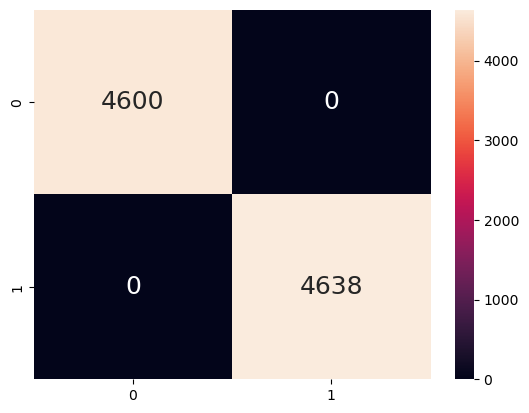

In [18]:
print("KNN Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_train, y_trainpred), 
           annot=True, fmt='.0f', annot_kws={"size":18})

print("Classification Accuracy: ", RFclf.score(x_train, y_train))
print('TPR: ', get_TPR(y_train, y_trainpred))
print('FPR: ', get_FPR(y_train, y_trainpred))

KNN Classifier Confusion Matrix
Classification Accuracy:  0.9848484848484849
TPR:  0.9780724120346762
FPR:  0.008504252126063032


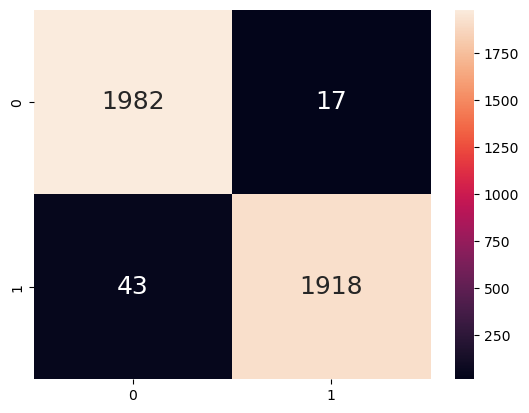

In [19]:
print("KNN Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_testpred), 
           annot=True, fmt='.0f', annot_kws={"size":18})

print("Classification Accuracy: ", RFclf.score(x_test, y_test))
print('TPR: ', get_TPR(y_test, y_testpred))
print('FPR: ', get_FPR(y_test, y_testpred))

## Tree Visualization

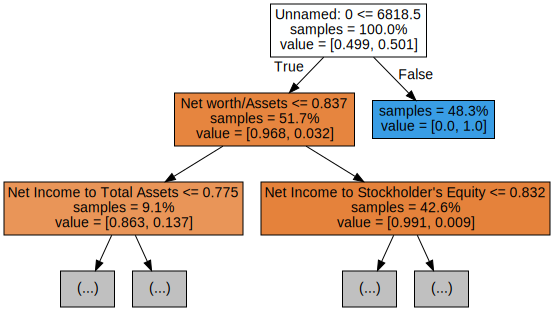

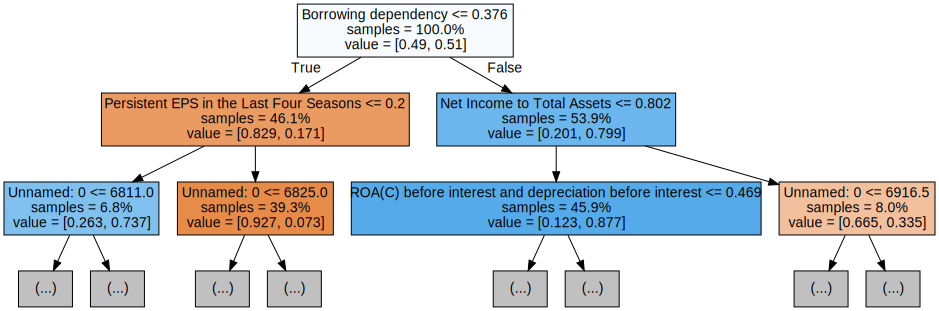

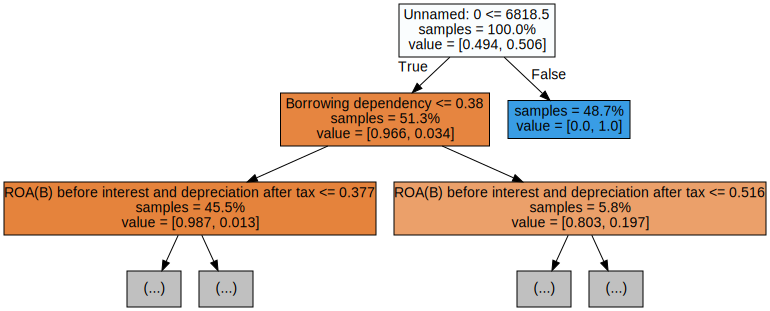

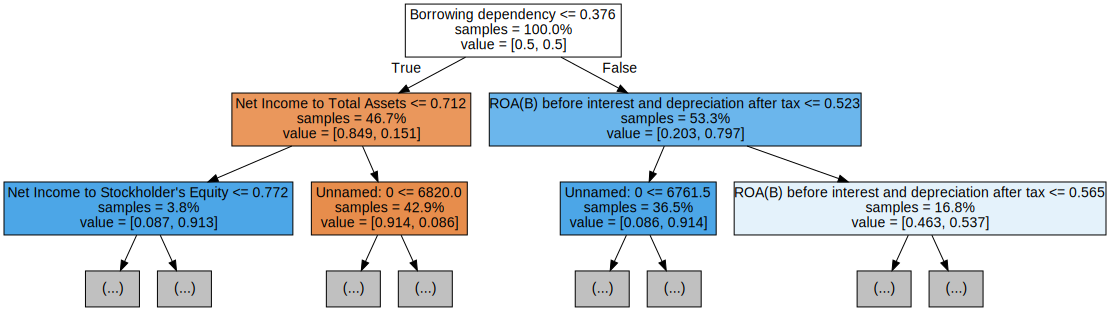

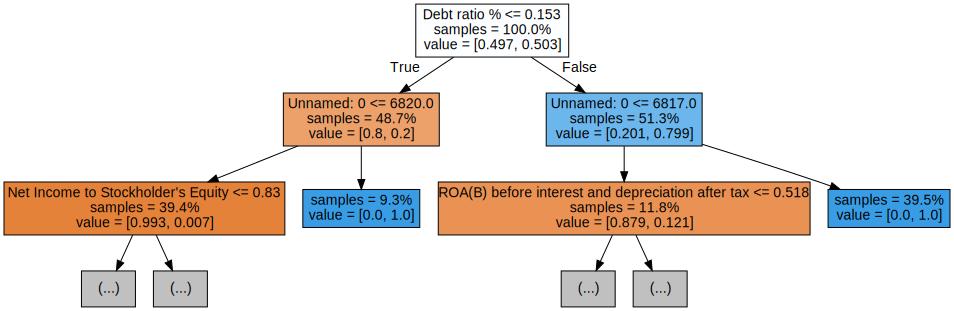

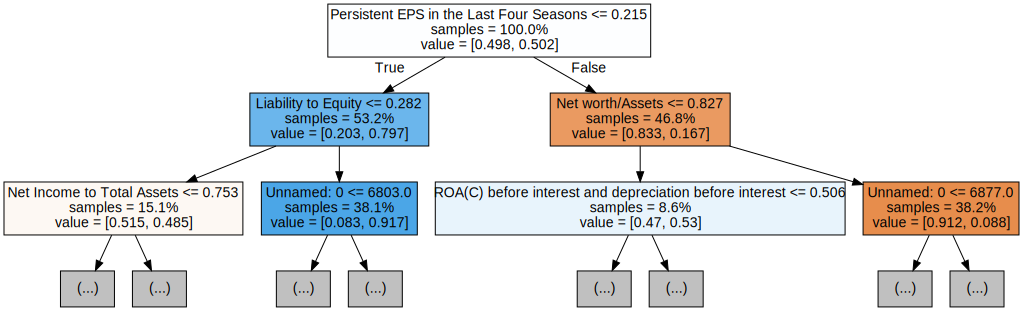

In [12]:
for i in range(6):
    tree = RFclf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)